In [15]:
import os
import matplotlib.pyplot as plt
import pywt
import numpy as np
%matplotlib inline

In [16]:
nscenarios = 3

In [17]:
means_file = "undecimated_wavelet_jvla_means.npy"

In [18]:
stds_file = "undecimated_wavelet_jvla_stds.npy"

In [19]:
use_wavelet = pywt.wavelist(kind="discrete")
use_wavelet.remove("haar")
nwavelets = len(use_wavelet)
idx_coif = [use_wavelet.index("coif1") - 0.5, use_wavelet.index("db1") - 0.5, use_wavelet.index("dmey") - 0.5,  use_wavelet.index("rbio1.1") - 0.5, use_wavelet.index("sym2") - 0.5]

In [20]:
scenarios_means = np.load(means_file)
scenarios_stds = np.load(stds_file)

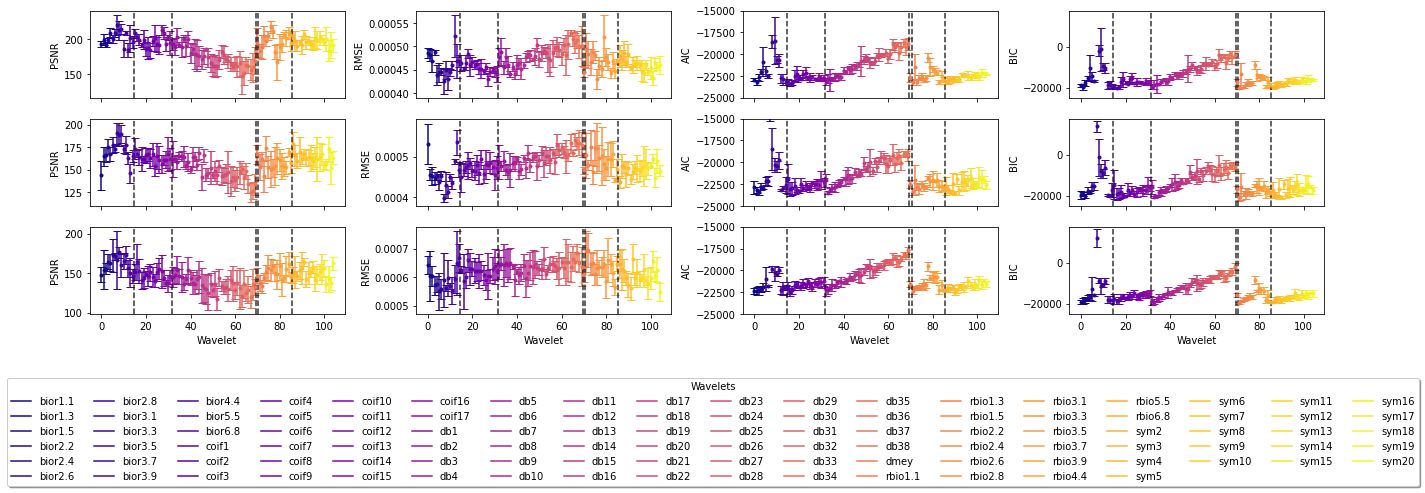

In [22]:
_id = np.arange(0, nwavelets)
names = ["PSNR", "RMSE", "AIC", "BIC"]  
fig, ax = plt.subplots(nrows=scenarios_means.shape[0], ncols=len(names), sharey='none', sharex='all', figsize=(18, 5))
#cmap = plt.get_cmap('tab20')
cmap = plt.get_cmap('plasma')
colors = [cmap(i) for i in np.linspace(0, 1, nwavelets)]

for i in range(scenarios_means.shape[0]):
    for j in range(len(names)):
        for k in range(scenarios_means.shape[2]):
            ax[i,j].plot(_id[k], scenarios_means[i,j,k], label=use_wavelet[k], color=colors[k])
            ax[i,j].errorbar(_id[k], scenarios_means[i,j,k], yerr = scenarios_stds[i,j,k], fmt ='.', capsize=4, color=colors[k])
            #if names[f] == "PSNR" and sc==3:
            #ax[sc-1,f].legend(loc='upper center', bbox_to_anchor=(0.5, -0.5), ncol=19, fancybox=True, shadow=True, title="Wavelets")
            ax[i,j].set_ylabel(names[j])
        if i==2:
            ax[i,j].set_xlabel("Wavelet")

for k in range(len(idx_coif)):
    for i in range(scenarios_means.shape[0]):
        for j in range(len(names)):
            ax[i,j].axvline(x = idx_coif[k], color = 'k', linestyle="--", alpha=0.8)
            
for i in range(scenarios_means.shape[0]):
    #ax[i,1].set_ylim([0,0.002])
    #ax[i,2].set_ylim([-25000,-20000])
    #ax[i,3].set_ylim([-25000,-20000])

    ax[i,2].set_ylim([-25000,-15000]) #undecimated
    ax[i,3].set_ylim([-25000,17500]) #undecimated

ofile_name = "undecimated_wavelets_jvla.png"
#fig.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol=19, fancybox=True, shadow=True, title="Wavelets")
#ax[len(scenarios)-1, 1].legend(loc='upper left', bbox_to_anchor=[1.0, -0.5], ncol=19, fancybox=True, shadow=True, title="Wavelets")
h, l = ax[0,0].get_legend_handles_labels()
legend = fig.legend(h, l, loc='lower center', ncol=18, fancybox=True, bbox_to_anchor=[0.52, -0.375], shadow=True, title="Wavelets")
fig.tight_layout()
if os.path.isfile(ofile_name):
    os.remove(ofile_name)   # Opt.: os.system("rm "+strFile)
fig.savefig(ofile_name, dpi=100, bbox_inches='tight')#